In [54]:
# pip install wordcloud nltk

In [56]:
# pip install kaggle

In [60]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from kaggle.api.kaggle_api_extended import KaggleApi
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
import warnings

warnings.filterwarnings("ignore")

# Download stopwords from NLTK
# nltk.download('punkt')
# nltk.download('stopwords')


In [15]:
# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

# Specify the dataset you want to download
dataset_name = 'alexandrakim2201/spotify-dataset'

# Download the dataset
api.dataset_download_files(dataset_name, path='.', unzip=True)  # 'path' specifies the directory to save files


Dataset URL: https://www.kaggle.com/datasets/alexandrakim2201/spotify-dataset


In [13]:
# Loading the dataset
spotify_data = pd.read_csv('spotify.csv')

# Viewing first few rows of the dataset
spotify_data.head()


,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE


In [15]:
# shape
spotify_data.shape

(52702, 2)

In [9]:
# Checking for missing values
spotify_data.isnull().sum()

Review    16
label      0
dtype: int64

In [17]:
# Removing rows with missing values
spotify_data.dropna(inplace=True)

In [19]:
# Checking for missing values again
spotify_data.isnull().sum()

Review    0
label     0
dtype: int64

In [27]:
# Converting text under the Review column to lowercase
spotify_data['Review'] = spotify_data['Review'].str.lower()

# Viewing first few rows of the dataset
spotify_data.head()

,Review,label
0,"great music service, the audio is high quality...",POSITIVE
1,please ignore previous negative rating. this a...,POSITIVE
2,"this pop-up ""get the best spotify experience o...",NEGATIVE
3,really buggy and terrible to use as of recently,NEGATIVE
4,dear spotify why do i get songs that i didn't ...,NEGATIVE


### Removing punctuation, numbers, and stopwords

The following code performs text cleaning by removing common, unimportant words (stopwords) and non-alphabetic characters from the reviews in the spotify_data dataset.

**Stopwords:** Common words like "the", "is", "and", etc., that don't contribute much meaning are removed. These words are stored in a set.

**clean_text() function:**
- Tokenization: The text is split into individual words (tokens).
- Filtering: Non-alphabetic tokens (e.g., punctuation, numbers) and stopwords are removed.
- Joining: The remaining words are joined back into a single string.

**Apply to Dataset:** The cleaning function is applied to the Review column, creating a new cleaned_reviews column.

This process prepares the text for further analysis, focusing on meaningful words.

In [34]:
# Common words ( "the", "is", "in", "and", ...) that do not carry significant meaning
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Tokenize and remove stopwords
    tokens = word_tokenize(text) # splits the input text into tokens (individual words or symbols: "I love Spotify!" would be tokenized into ['I', 'love', 'Spotify', '!'].)
    cleaned_text = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(cleaned_text)

# Apply cleaning function to the 'Review' column
spotify_data['cleaned_reviews'] = spotify_data['Review'].apply(clean_text)

# View cleaned data
spotify_data.head()


,Review,label,cleaned_reviews
0,"great music service, the audio is high quality...",POSITIVE,great music service audio high quality app eas...
1,please ignore previous negative rating. this a...,POSITIVE,please ignore previous negative rating app sup...
2,"this pop-up ""get the best spotify experience o...",NEGATIVE,get best spotify experience android annoying p...
3,really buggy and terrible to use as of recently,NEGATIVE,really buggy terrible use recently
4,dear spotify why do i get songs that i didn't ...,NEGATIVE,dear spotify get songs put playlist shuffle play


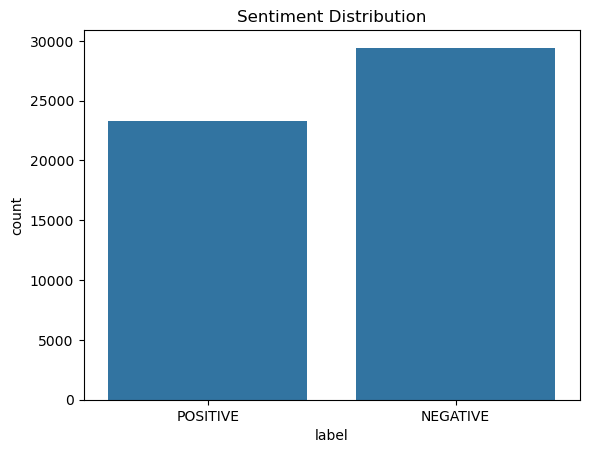

In [38]:
# Plot sentiment distribution
sns.countplot(x='label', data=spotify_data)
plt.title('Sentiment Distribution')
plt.show()

### *Analysis of Sentiment Distribution*

#### X-axis (Sentiment Labels):

The x-axis represents the two sentiment categories: POSITIVE and NEGATIVE. These correspond to user reviews of the Spotify app, where each review is categorized as either positive or negative based on its sentiment.

#### Y-axis (Count):

The y-axis shows the number of reviews that fall under each sentiment category. The count represents how many reviews were labeled as either "POSITIVE" or "NEGATIVE."

The sentiment distribution suggests that, while there are many positive reviews, the negative feedback is slightly more prominent, which might indicate areas for improvement in the app or user experience.

### *Understanding Public Opinion:*
Many of users are dissatisfied or have issues with the app, suggesting that there might be room for improvement in the user experience or features offered by Spotify.
This negative sentiment could point to specific aspects of the app that users may not like, which could be explored further by analyzing the specific content of the reviews.

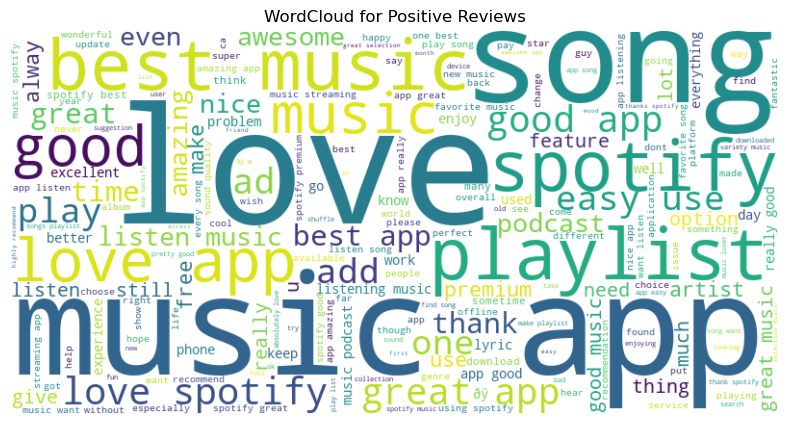

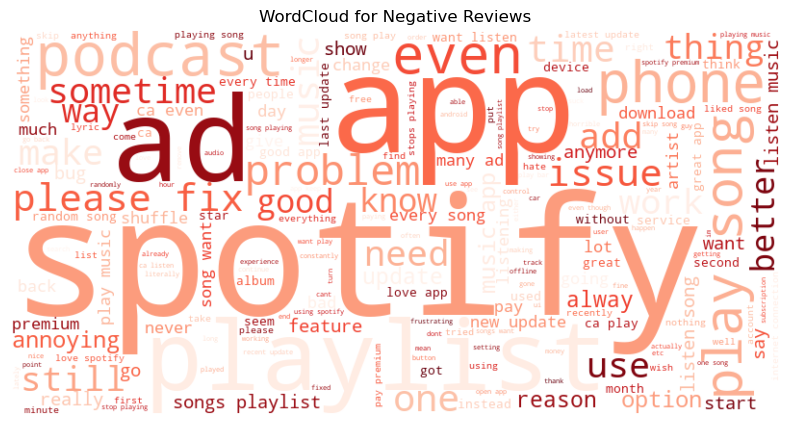

In [104]:
# Separate positive and negative reviews
positive_reviews = ' '.join(spotify_data[spotify_data['label'] == 'POSITIVE']['cleaned_reviews'])
negative_reviews = ' '.join(spotify_data[spotify_data['label'] == 'NEGATIVE']['cleaned_reviews'])

# Generate word cloud for positive reviews
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('WordCloud for Positive Reviews')
plt.axis('off')
plt.show()

print()


# Generate word cloud for negative reviews
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('WordCloud for Negative Reviews')
plt.axis('off')
plt.show()


### *Interpretation of the Word Clouds:*
*Positive Reviews Word Cloud (Top Section):*


Positive reviews highlight user appreciation for Spotify, with words like "love," "music," "app," and "spotify" reflecting enjoyment of the app's music and features. Positive adjectives such as "best," "great," and "good" emphasize user satisfaction, while terms like "playlist," "song," and "play" suggest a focus on music listening. Words like "premium," "offline," and "easy" indicate enjoyment of the app's premium features and user-friendly experience.

*Negative Reviews Word Cloud (Bottom Section):*

In the negative reviews, words like "app," "spotify," and "use" highlight that users are still discussing the app but are focusing on problems they encounter. Terms such as "ad," "problem," "issue," and "fix" point to frustrations with ads, technical difficulties, and the need for app improvements. Words like "phone," "song," "playlist," and "update" suggest issues with app functionality, music playback, or changes after updates. "Please," "never," and "annoying" reflect users' dissatisfaction, while "premium" and "service" suggest that problems may also be related to subscription features or premium services.


*General Insights:*

Positive reviews are mostly about user enjoyment of the music and app features, with frequent references to Spotify's usefulness for music and playlist management.
Negative reviews focus on issues with the app's functionality, technical glitches, excessive ads, and user frustrations with features like premium services or updates.

In [116]:
# Split the dataset into train and test sets
X = spotify_data['cleaned_reviews']
y = spotify_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [127]:
# Convert text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [129]:
# Train a logistic regression model
lrm = LogisticRegression(max_iter=1000)
lrm.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = lrm.predict(X_test_tfidf)


              precision    recall  f1-score   support

    NEGATIVE       0.89      0.91      0.90      5864
    POSITIVE       0.88      0.85      0.87      4674

    accuracy                           0.88     10538
   macro avg       0.88      0.88      0.88     10538
weighted avg       0.88      0.88      0.88     10538



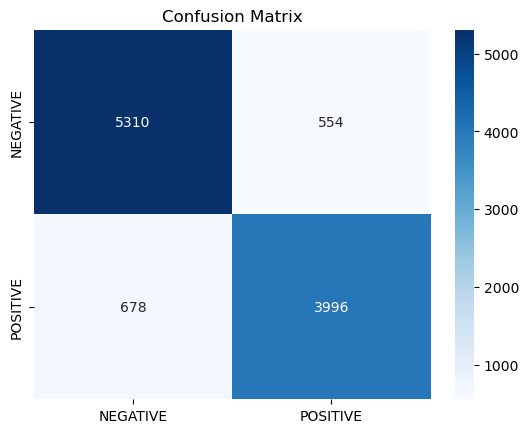

In [131]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['NEGATIVE', 'POSITIVE'], yticklabels=['NEGATIVE', 'POSITIVE'])
plt.title('Confusion Matrix')
plt.show()


The model shows strong performance in classifying Spotify reviews, with an overall accuracy of 88%. It achieves high precision and recall for both negative (precision: 0.89, recall: 0.91) and positive (precision: 0.88, recall: 0.85) reviews, with a balanced F1-score for negative reviews (0.90) and slightly lower for positive reviews (0.87).

In [160]:
# Sample review input
new_review = ["happy"]

new_review_cleaned = new_review  # You can add preprocessing here if needed

# Transform the new review using the same TF-IDF vectorizer used in training
new_review_tfidf = vectorizer.transform(new_review_cleaned)

# Make prediction
prediction = lrm.predict(new_review_tfidf)
print(prediction)

['POSITIVE']
